<a href="https://colab.research.google.com/github/manusevo/CALCOLO-DISTRIBUITO-E-PARALLELO-/blob/master/Progetto_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pip install per generare il QRCODE

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install qrcode[pil]

In [ ]:
#percorsi delle varie immagini per rendere il codice più pulito
root = "/content/drive/MyDrive/Progetto Watermarking/Immagini/"

In [ ]:
ImgOriginale = "Roma.png"
ImgMarchio = "imgwatermarking.png"

Calcolo PSNR immagine originale ed immagine con il QR code dentro:

In [ ]:
# importo librerie per calcolo PSNR
from math import log10, sqrt, inf
import cv2
import numpy as np
 
#definisco la funzione per il calcolo
def PSNR(original, compressed):
    original = cv2.imread(original, cv2.IMREAD_UNCHANGED) #inserire l'immagine origianle da confrontare
    compressed = cv2.imread(compressed, cv2.IMREAD_UNCHANGED) #inserire l'immagine "modificata" (che include il QRCODE)
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                   # Therefore PSNR have no importance.
        return inf #se l'immagine è "perfetta"
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr # valore di ritorno del PSNR

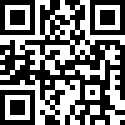

In [ ]:
import qrcode
border = 0 
box = 5
ver = 1
qr = qrcode.QRCode(
    version=ver,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=box,
    border=border,
)
qr.add_data("www.google.it/")#Assegnamo le info che deve contenere il qrcode
qr.make(fit=True)
imgQr = qr.make_image(fill_color="black", back_color="white")
imgQr.save(root+"qrcode.png") #salvo il qrcode
imgQr # visualizzo il qrcode

In [ ]:
from PIL import Image
from numpy import array
#conversione qrcode to array di valori numerici
im_1 = Image.open(root+"qrcode.png") # vado ad aprire l'immagine contentente il qr
ar = array(im_1).astype(int)
ar #visualizzo l'array che descrive il qr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# importing libraries
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
# reading the image data from desired directory
img = cv2.imread(root+'qrcode.png', cv2.IMREAD_UNCHANGED)

#conto il numero dei pixel
number_of_white_pix = np.sum(img == 255)
number_of_black_pix = np.sum(img == 0)
#stampo i numeri dei pixel (compresi i bordi)
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 7225
Number of black pixels: 8400


In [ ]:
number_of_black_pix = 0
number_of_white_pix = 0
for i in range(border,(len(ar)-border)):
  for j in range(border,(len(ar)-border)):
    if ar[i,j] == 1:
      number_of_white_pix += 1
    else:
      number_of_black_pix += 1
#stampo i numeri dei pixel ESCLUDENDO i bordi
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 7225
Number of black pixels: 8400


In [ ]:
#dimensione qrcode
from PIL import Image
im = Image.open(root+'qrcode.png')
#stampo la dimensione del qr
print(im.size)
print(type(im.size))

(125, 125)
<class 'tuple'>


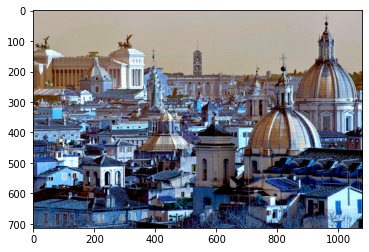

In [ ]:
# importing libraries
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
# reading the image data from desired directory
img = cv2.imread(root+ImgOriginale, cv2.IMREAD_UNCHANGED)
#stampa il grafico dell'immagine
plt.imshow(img)
plt.show()

In [ ]:
#dimensione immagine
from PIL import Image
from numpy import array
im = Image.open(root+ImgOriginale) # apro l'immagine di Roma 
#stampo altezza e e tipo dell'immagine
print(im.size)
print(type(im.size))

#carico l'immagine di ROMA
ImgRoma = im.load()
ImgRoma

(1080, 713)
<class 'tuple'>


In [ ]:
#dimensioni qrcode
img = Image.open(root +'qrcode.png')
 
# calcolo le dimensioni dell'immagine contente il QRCODE
wq = img.size[0]
hq = img.size[1]
print(wq)
print(hq)

 
# calcolo le dimensioni dell'immagine contente ROMA
wg = im.size[0]
hg = im.size[1]
print(wg)
print(hg)

125
125
1080
713


**----------------------------           PRIMA CODIFICA              ---------------------------------**

In [ ]:
#importo librerie per codifica
import random 
from sys import argv
from qrcode import make as makeQR

#creazione coordinata randomica (il meno è per non uscire dell'immagine di ROMA)
wr = random.randint(0, (wg-wq))
hr = random.randint(0, (hg-hq))

#stampo le cordinate randomiche dove vado a inserire il QRCODE
print(wr)
print(hr)
for i in range(0, wq):
  for j in range(0, hq): 
      d = ImgRoma[wr+i,hr+j]
      
      #questa è prima versione
      ImgRoma[wr+i,hr+j] = d[:-1] + ((d[-1] | 1 ) if imgQr.getpixel((i, j)) else (d[-1] & ~1),)
im.save(root+ImgMarchio)


565
251


In [ ]:
value = PSNR(root+ImgOriginale, root+ImgMarchio)
#stampo il risultato del calcolo del PSNR
print(f"PSNR value is {value} dB")

PSNR value is 39.67274828753811 dB


Questa è la decodifica di quando vado a lavorare sul **canale della trasparenza** (il canle in questione è ALPHA) 

In [ ]:
from PIL import Image
from sys import argv
from qrcode import make as makeQR
 
if __name__ == '__main__':
    im = Image.open(root+ImgMarchio)
    
    s = w, h = im.size
    imd = im.load()
 
    oim = Image.new('1',s) #crea un immagine completamente nera
    oimd = oim.load()
 
    for i in range(w):
        for j in range(h):
            d = imd[i, j] 
            oimd[i, j] = 255 * (d[-1] & 1) 
oim.save(root+'imgDecodificata.png')

Per utilità siamo andati a creare un codice che ci permette di cancellare tutte le immagini che siamo andati a creare.

In [ ]:
#cancellare tutti i file che abbiamo creato
import os
check = input('vuoi cancellare? (yes)')
if check == 'yes' :
  try:
      os.remove(root+'imgDecodificata.png')
      #os.remove(root+'qrcode.png')
      os.remove(root+'imgwatermarking.png')
  except OSError as e:
      print("Error: %s : %s" % (root, e.strerror))

vuoi cancellare? (yes)yes


**------------------ CODIFICA 2 -----------------------**

In [ ]:
#conversione qrcode to array di valori numerici
im_1 = Image.open(root+"qrcode.png")
ar_come_dovrebbe_essere = array(im_1)
ar = (array(im_1)).astype(int)
ar #mostro l'array che ho ottenuto

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
      

encoder della secondo metodo di watermarking

In [ ]:
def Encode(src, message, dest, Encode_key):

    img = Image.open(src, 'r')
    width, height = img.size
    array = np.array(list(img.getdata()))

    #controllo di che tipo di immagine andiamo a watermarcare
    # png --> 4 canali (rgba) 
    # jpg --> 3 canali (rgb)
    if img.mode == 'RGB': 
        n = 3
    elif img.mode == 'RGBA':
        n = 4
    total_pixels = array.size//n

    message += str(Encode_key)
    b_message = ''.join([format(ord(i), "08b") for i in message])
    req_pixels = len(b_message)
    
    if req_pixels > total_pixels:
        print("ERROR: Need larger file size")

    else:
        index=0
        for p in range(total_pixels):
            for q in range(0, 3):
                if index < req_pixels:
                    array[p][q] = int(bin(array[p][q])[2:9] + b_message[index], 2)
                    index += 1

        array=array.reshape(height, width, n)
        enc_img = Image.fromarray(array.astype('uint8'), img.mode)
        enc_img.save(dest)
        print("Image Encoded Successfully")

DECODER del secondo metodo di watermarking

In [ ]:
msg_nascosto = ""

def Decode(src, Encode_key):
    img = Image.open(src, 'r')
    array = np.array(list(img.getdata()))
    if img.mode == 'RGB':
        n = 3
    elif img.mode == 'RGBA':
        n = 4
    total_pixels = array.size//n
    hidden_bits = ""
    for p in range(total_pixels):
        for q in range(0, 3):
            hidden_bits += (bin(array[p][q])[2:][-1])

    hidden_bits = [hidden_bits[i:i+8] for i in range(0, len(hidden_bits), 8)]
    a = 5
    message = ""
    for i in range(len(hidden_bits)):
        if message[-len(str(Encode_Key)):] == str(Encode_key):
            break
        else:
            message += chr(int(hidden_bits[i], 2))
    if str(Encode_key) in message:
        print("Messaggio nascosto:", message[:-len(str(Encode_Key))])
        return message[:-len(str(Encode_Key))]
    else:
        print("No Hidden Message Found")

In [ ]:
import random
import string

def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    print("Random string of length", length, "is:", result_str)

    return result_str

Cella per avviare e mostrare i risultati del watermarking numero 2

N.b. qui codifichiamo una stringa contente tutti 0 e 1 che poi ci permette di ricreare il QRCODE

In [ ]:
print("--METODO 2--")
src = root+ImgOriginale

#metto l'array in stringa da nascondere
message = str(ar) 
print(message)

dest = (root+'seconda_decofica.png')
print("Encoding...")

Encode_Key = get_random_string(6)
Encode(src, message, dest, Encode_Key)

chiave_utente = input("Inserisci la chiave di decodifica")

#messaggio_nascosto = Decode(dest,chiave_utente)


--METODO 2--
[[0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0]
 [0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]
 [1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0]
 [0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0]
 [1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0]
 [1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1

In [ ]:
messaggio_nascosto = Decode(dest,chiave_utente)

Messaggio nascosto: [[0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0]
 [0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]
 [1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0]
 [0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0]
 [1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0]
 [1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 

Dalla stringa si torna all'array 

In [ ]:
import numpy as np

messaggio_split = messaggio_nascosto.split()
messaggio_split
print(len(messaggio_split))
print(messaggio_split[0])

array_per_immagine1 = []
for i in range(0, len(messaggio_split)):
  if (messaggio_split[i].startswith("1") or messaggio_split[i].endswith("1")):
    array_per_immagine1.append(1)
  elif (messaggio_split[i].startswith("0") or messaggio_split[i].endswith("0")):
    array_per_immagine1.append(0)

array = np.array(array_per_immagine1)
print(array.size)
array_reshape = (array).reshape(wq,-1)
print(array_reshape)
array_reshape = np.pad(array_reshape, pad_width=1, mode='constant', constant_values=1)
#array_reshape

625
[[0
625
[[0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0]
 [0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]
 [1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0]
 [0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0]
 [1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0]
 [1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 

In [ ]:
#creazione del QRCODE partendo da un array di 0 e 1 
new_image = Image.fromarray((array_reshape * 255).astype(np.uint8))
new_image.save(root+"QR-Stego.png")
new_image


PSNR della seconda codifica

In [ ]:
value = PSNR(root+ImgOriginale, dest)
print(f"PSNR value is {value} dB")

PSNR value is 75.69984305706052 dB


----------------------------------------------------------------------------------------------------------------------------------------------------------------

TERZO METODO: vado a controllare se un immagine dispone del canale di trasparenza oppure no. <br>
Dopo di che vado a modificare sequenzialmente tutti i canali R G B (se presente) A

In [ ]:
#check della presenza della trasparenza 
import imghdr
imghdr.what(root+ImgOriginale)
if imghdr.what(root+ImgOriginale) == 'png':
  alpha = True
else: 
 alpha = False

print(alpha)

True


In [ ]:
#creazione coordinata randomica 
import random 
from sys import argv
from qrcode import make as makeQR
wr =random.randint(0, (wg-wq))
hr =random.randint(0, (hg-hq))
#wr = 0 #hr = 0
print(wr)
print(hr)
print(im.size)
c=0
if alpha:
  Ncanali = 4
  for i in range(wq):#wq
    for j in range(hq): #hq
      
        d = ImgRoma[wr+i,hr+j]
        
        if c%Ncanali == 0: #modifico il rosso
          if d[0]==0:
            ImgRoma[wr+i,hr+j] = ((d[-4]) if imgQr.getpixel((i, j)) else (d[-4] +1),)+ d[-3:]
          else: 
            ImgRoma[wr+i,hr+j] = ((d[-4]) if imgQr.getpixel((i, j)) else (d[-4] -1),)+ d[-3:]
        elif c%Ncanali == 1: #modifico il verde
          if d[1]==0:
            ImgRoma[wr+i,hr+j] = (d[:-3])+((d[-3]) if imgQr.getpixel((i, j)) else (d[-3] +1),)+ d[-2:]
          else: 
            ImgRoma[wr+i,hr+j] = (d[:-3])+((d[-3]) if imgQr.getpixel((i, j)) else (d[-3] -1),)+ d[-2:]
        elif c%Ncanali == 2: #modifico il blu
          if d[2]==0:
            ImgRoma[wr+i,hr+j] = (d[:-2])+((d[-2]) if imgQr.getpixel((i, j)) else (d[-2] +1),)+ d[-1:]
          else: 
            ImgRoma[wr+i,hr+j] = (d[:-2])+((d[-2]) if imgQr.getpixel((i, j)) else (d[-2] -1),)+ d[-1:]
        elif c%Ncanali == 3: #modifico alpha
          ImgRoma[wr+i,hr+j] = d[:-1] + ((d[-1] | 1 ) if imgQr.getpixel((i, j)) else (d[-1] & ~1),)
        c = c + 1
else:
  Ncanali = 3
  for i in range(wq):#wq
    for j in range(hq): #hq

        d = ImgRoma[wr+i,hr+j]
        if c%Ncanali == 0: #modifico il rosso 
          if d[0]==0:
            ImgRoma[wr+i,hr+j] = ((d[0]) if imgQr.getpixel((i, j)) else (d[0] + 1),)+ d[-2:]
          else:
            ImgRoma[wr+i,hr+j] = ((d[0]) if imgQr.getpixel((i, j)) else (d[0] - 1),)+ d[-2:]
        elif c%Ncanali == 1: #modifico il verde
          if d[1]==0:
            ImgRoma[wr+i,hr+j] = d[:-2]+((d[1]) if imgQr.getpixel((i, j)) else (d[1] + 1),)+ d[-1:]
          else:
            ImgRoma[wr+i,hr+j] = d[:-2]+((d[1]) if imgQr.getpixel((i, j)) else (d[1] - 1),)+ d[-1:]
        elif c%Ncanali == 2: #modifico il blu
          if d[2]==0:
            ImgRoma[wr+i,hr+j] = d[:-1] + ((d[2]) if imgQr.getpixel((i, j)) else (d[2] + 1),)
          else:
            ImgRoma[wr+i,hr+j] = d[:-1] + ((d[2]) if imgQr.getpixel((i, j)) else (d[2] - 1),)
        c = c +1

print("il numero dei canali è --> " + str(Ncanali))
im.save(root+ImgMarchio)

289
132
(1080, 713)
il numero dei canali è --> 4


In [ ]:
#ImgMarchio = "test.jpg"
im = Image.open(root+ImgOriginale)
ImgRoma = im.load()
im1 = Image.open(root+ImgMarchio)
print(im1.getbands())
ImgRoma1 = im1.load()
print(ImgRoma1[0,0])
#Controllo se le due immagini hanno lo stesso canale Alpha
imghdr.what(root+ImgMarchio)
if str(im1.getbands()) == "('R', 'G', 'B', 'A')":
  alpha = True
else: 
  alpha = False
print(alpha)

('R', 'G', 'B', 'A')
(165, 179, 190, 255)
True


In [ ]:
#DECODIFICA
from PIL import Image
from sys import argv
from qrcode import make as makeQR 

if __name__ == '__main__':
    #nome_img = input('inserire il nome immagine con marchio ') #per non toccare sempre il codice inserire il nome dell'immagine con il marchio
    im = Image.open(root+ImgMarchio) #immagine con marchio 
    imd = im.load()
    imo = Image.open(root+ImgOriginale) #immagine originale
    imdo = imo.load()
    s = w, h = im.size
    oim = Image.new('1',s) #crea un immagine completamente nera RICORDA --> 0 = NERO 255 = BIANCO
    oimd = oim.load() #immagine nuova
    

    for i in range(w): #w
        for j in range(h): #h
            if alpha: #caso in cui usiamo immagini che supportano la trasparenza (png)
              d = imd[i, j] # immagine con marchio 
              orig = imdo[i,j] # immagine originale
              if (d[0] == orig[0]) and (d[1] == orig[1]) and (d[2] == orig[2]) and (d[3] == orig[3]):
                oimd[i, j] = 255
              else:
                oimd[i, j] = 0

            else: # caso in chi usiamo formati a soli tre canali (jpg)
              d = ImgRoma1[i, j] # immagine con marchio 
              orig = ImgRoma[i,j] 
              if ((d[0] == orig[0]) and (d[1] == orig[1]) and (d[2] == orig[2])):
                oimd[i, j] = 255
              else:
                oimd[i, j] = 0
              
#salvataggio della decodifica, in questa immagine trovo il QRCODE
if alpha:
  oim.save(root+'imgDecodificataRGB.png')
else:
  oim.save(root+'imgDecodificataRGB.jpg')

print("l'immagine originale è --> "+ ImgOriginale)
print("l'immagine con marchio è --> "+ ImgMarchio)

l'immagine originale è --> Roma.png
l'immagine con marchio è --> watermarking_terzo_metodo_tagliata.png


In [ ]:
value = PSNR(root+ImgOriginale, root+ImgMarchio)
print(f"PSNR value is {value} dB")

PSNR value is 73.77374351472807 dB
